In [351]:
#import necessary packages
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sklearn
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [352]:
#import Data

#import PL data
PL_18_19 = pd.read_csv('Data/other_years/E_18_19.csv')
PL_19_20 = pd.read_csv('Data/other_years/E_19_20.csv')
PL_20_21 = pd.read_csv('Data/2020-21/Fixtures/E_20_21.csv')
PL_21_22 = pd.read_csv('Data/other_years/E_21_22.csv')

#import xG for PL
PL_18_19_xG = pd.read_csv('Data/other_years/E_18_19_xG.csv')
PL_19_20_xG = pd.read_csv('Data/other_years/E_19_20_xG.csv')
PL_20_21_xG = pd.read_csv('Data/2020-21/Fixtures/E_20_21_xG.csv')
PL_21_22_xG = pd.read_csv('Data/other_years/E_21_22_xG.csv')


In [353]:
#Merge data
PL_total = pd.concat([PL_18_19, PL_19_20, PL_20_21, PL_21_22])
PL_total_xG = pd.concat([PL_18_19_xG, PL_19_20_xG, PL_20_21_xG, PL_21_22_xG])

#remove unnecessary columns
not_relevant_columns = ['BbOU','BbMx>2.5','BbAv>2.5','BbMx<2.5','B365>2.5','B365<2.5','P>2.5','P<2.5','Max>2.5','Max<2.5','Avg>2.5','Avg<2.5','BbAH','BbAHh','AHh','BbMxAHH','BbAvAHH','BbMxAHA','BbAvAHA','B365AHH','B365AHA','PAHH','PAHA','MaxAHH','MaxAHA','AvgAHH','AvgAHA','Time','MaxH','MaxD','MaxA','AvgH','AvgD','AvgA','B365CH','B365CD','B365CA','BWCH','BWCD','BWCA','IWCH','IWCD','IWCA','WHCH','WHCD','WHCA','VCCH','VCCD','VCCA','MaxCH','MaxCD','MaxCA','AvgCH','AvgCA','AvgCD','B365C>2.5','B365C<2.5','PC>2.5','PC<2.5','AHCh','B365CAHH','B365CAHA','PCAHH','PCAHA','MaxCAHH','MaxCAHA','AvgCAHH','AvgCAHA','BbAv<2.5','MaxC>2.5','MaxC<2.5','AvgC>2.5','AvgC<2.5']
#reset index
PL_total.drop( axis= 1, labels=not_relevant_columns, inplace=True)
PL_total.reset_index(inplace=False, drop=True)
PL_total['Date'] = pd.to_datetime(PL_total['Date'], dayfirst=True)
#update team names for merging
PL_total.replace(['Man City', 'Man United', 'Cardiff', 'Leeds', 'Leicester','Newcastle', 'Norwich','Sheffield United'], ['Manchester City', 'Manchester Utd', 'Cardiff City', 'Leeds United', 'Leicester City','Newcastle Utd','Norwich City','Sheffield Utd'], inplace=True)
PL_20_21.replace(['Man City', 'Man United', 'Cardiff', 'Leeds', 'Leicester','Newcastle', 'Norwich','Sheffield United'], ['Manchester City', 'Manchester Utd', 'Cardiff City', 'Leeds United', 'Leicester City','Newcastle Utd','Norwich City','Sheffield Utd'], inplace=True)

#remove nan values and reset index
PL_total_xG.drop(labels='Notes', axis=1, inplace=True)
PL_total_xG.dropna(axis=0, inplace=True, how='all')
PL_total_xG.reset_index(inplace=True, drop=True)

#create ID's for join
PL_total['ID'] = PL_total['Date'].astype(str) + PL_total ['HomeTeam'] + PL_total ['AwayTeam']
PL_total_xG['ID'] = PL_total_xG['Date'].astype(str) + PL_total_xG ['Home'] + PL_total_xG ['Away']

#merge dataframes
PL = pd.merge(PL_total, PL_total_xG, on='ID', how='left')

PL_total


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,PSCH,PSCD,PSCA,ID
0,E0,2018-08-10,Manchester Utd,Leicester City,2,1,H,1,0,H,...,1.60,1.56,4.20,3.92,8.05,7.06,1.55,4.07,7.69,2018-08-10Manchester UtdLeicester City
1,E0,2018-08-11,Bournemouth,Cardiff City,2,0,H,1,0,H,...,1.93,1.88,3.71,3.53,4.75,4.37,1.88,3.61,4.70,2018-08-11BournemouthCardiff City
2,E0,2018-08-11,Fulham,Crystal Palace,0,2,A,0,1,A,...,2.60,2.47,3.49,3.35,3.05,2.92,2.62,3.38,2.90,2018-08-11FulhamCrystal Palace
3,E0,2018-08-11,Huddersfield,Chelsea,0,3,A,0,2,A,...,6.85,6.09,4.07,3.90,1.66,1.61,7.24,3.95,1.58,2018-08-11HuddersfieldChelsea
4,E0,2018-08-11,Newcastle Utd,Tottenham,1,2,A,1,2,A,...,4.01,3.83,3.57,3.40,2.12,2.05,4.74,3.53,1.89,2018-08-11Newcastle UtdTottenham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,E0,2022-03-13,West Ham,Aston Villa,2,1,H,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,2.58,3.31,3.01,2022-03-13West HamAston Villa
279,E0,2022-03-13,Arsenal,Leicester City,2,0,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,1.45,4.78,7.92,2022-03-13ArsenalLeicester City
280,E0,2022-03-14,Crystal Palace,Manchester City,0,0,D,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,9.88,5.58,1.34,2022-03-14Crystal PalaceManchester City
281,E0,2022-03-16,Brighton,Tottenham,0,2,A,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,3.79,3.49,2.12,2022-03-16BrightonTottenham


In [354]:
#feature selection on Home, Draw, Away

#add column for H A X
conditions = [
    (PL['FTR'] == 'H'),
    (PL['FTR'] == 'A'),
    (PL['FTR'] == 'D')]
choices = [1, 2, 3]
PL['identifier'] = np.select(conditions, choices)
Gy = PL['identifier'].to_numpy()
GX = PL[[ 'FTHG', 'FTAG','HTHG', 'HTAG', 'xG', 'xG.1','HS', 'AS', 'HST', 'AST', 'B365H', 'B365A', 'HY' ]].to_numpy()

In [355]:
#feature selection Home Goals
#PL['identifier'] = np.select(conditions, choices)
#Gy = PL['FTHG'].to_numpy()
#GX = PL[[ 'HTHG', 'xG','HS', 'HST','B365H']].to_numpy()

In [356]:
#test which features are most important
sel = SelectKBest(f_classif, k=4)
sel.fit(GX, Gy)
sel.transform(GX).shape
sel.scores_

scores = -np.log10(sel.pvalues_)
scores


array([190.02002632, 186.31628543,  67.71073803,  75.62140132,
        74.73968972,  81.44094491,  22.24817231,  27.40982007,
        72.11655789,  69.17999405,  44.19915966,  42.16148567,
         5.73573049])

In [357]:
#import player stats for 20_21
merged_gw_20_21 = pd.read_csv('Data/2020-21/Players/Fantasy_League/merged_gw_20-21.csv')

merged_gw_20_21

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Aaron Connolly,FWD,Brighton,0.5,0,0,-3,0,0.3,78,...,1,32.0,1,0,0,0,55,True,0,1
1,Aaron Cresswell,DEF,West Ham,2.1,0,0,11,0,11.2,435,...,0,0.0,1,0,0,0,50,True,0,1
2,Aaron Mooy,MID,Brighton,0.0,0,0,0,0,0.0,60,...,1,0.0,0,0,0,0,50,True,0,1
3,Aaron Ramsdale,GK,Sheffield Utd,2.5,0,0,12,0,0.0,483,...,0,0.0,1,0,0,0,50,True,0,1
4,Abdoulaye Doucouré,MID,Everton,1.3,0,0,20,1,44.6,512,...,0,4.0,3,0,0,0,55,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24360,Aaron Ramsdale,GK,Sheffield Utd,9.0,0,2,30,1,10.0,483,...,1,0.0,9,13618,17381,3763,46,True,0,38
24361,Adrien Silva,MID,Leicester,0.0,0,0,0,0,0.0,220,...,2,0.0,0,-16,0,16,44,True,0,38
24362,Sidnei Tavares,MID,Leicester,0.0,0,0,0,0,0.0,676,...,2,0.0,0,32,60,28,44,True,0,38
24363,Kalvin Phillips,MID,Leeds,6.5,0,0,17,0,12.8,204,...,3,8.0,6,210,789,579,49,True,1,38


In [358]:
#import player ratings fifa
players_fifa_21 = pd.read_csv('Data/2020-21/Players/players_fifa_21.csv')

#delete not relevant information
not_relevant_columns = ['player_positions','player_url','dob','height_cm', 'weight_kg', 'league_level', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'goalkeeping_speed', 'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk','player_face_url','club_logo_url','club_flag_url','nation_logo_url', 'nation_flag_url','club_jersey_number','weak_foot','skill_moves','international_reputation']
players_fifa_21.drop( axis= 1, labels=not_relevant_columns, inplace=True)
players_fifa_21.reset_index(inplace=False, drop=True)

players_fifa_21.drop(players_fifa_21[players_fifa_21.league_name != 'English Premier League'].index, inplace=True)
players_fifa_21.reset_index(inplace=True, drop=True)
players_fifa_21 = players_fifa_21.astype({'value_eur':'int','club_team_id':'int'})
#update Team names for merge
players_fifa_21.replace(['Wolverhampton Wanderers', 'Manchester United', 'West Bromwich Albion', 'West Ham United', 'Brighton & Hove Albion','Newcastle United', 'Tottenham Hotspur', 'Sheffield United'], ['Wolves', 'Manchester Utd', 'West Brom', 'West Ham', 'Brighton','Newcastle Utd', 'Tottenham', 'Sheffield Utd'], inplace=True)


players_fifa_21

,sofifa_id,short_name,long_name,overall,potential,value_eur,wage_eur,age,club_team_id,club_name,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,192985,K. De Bruyne,Kevin De Bruyne,91,91,129000000,370000.0,29,10,Manchester City,...,84,91,68,65,53,15,13,5,10,13
1,203376,V. van Dijk,Virgil van Dijk,90,91,113000000,210000.0,28,9,Liverpool,...,62,90,93,93,86,13,10,13,11,11
2,208722,S. Mané,Sadio Mané,90,90,120500000,250000.0,28,9,Liverpool,...,71,84,42,42,38,10,10,15,7,14
3,209331,M. Salah,Mohamed Salah Ghaly,90,90,120500000,250000.0,28,9,Liverpool,...,83,90,38,43,41,14,14,9,11,14
4,212831,Alisson,Alisson Ramsés Becker,90,91,102000000,160000.0,27,9,Liverpool,...,23,65,15,19,16,86,88,85,91,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,247012,M. Tait,Michael Tait Moran,52,69,210000,5000.0,19,2,Aston Villa,...,61,44,20,15,12,13,11,6,13,8
650,251546,K. Gordon,Kyron Gordon,52,70,190000,1000.0,18,1794,Sheffield Utd,...,30,36,49,53,54,10,5,9,6,11
651,243890,C. Rowe,Callum Miles Rowe,51,65,140000,6000.0,20,2,Aston Villa,...,46,46,44,41,52,10,12,11,14,11
652,251674,J. Belehouan,Jean Leroy-Belehouan,50,64,110000,2000.0,19,1794,Sheffield Utd,...,29,30,42,52,48,13,12,6,7,12


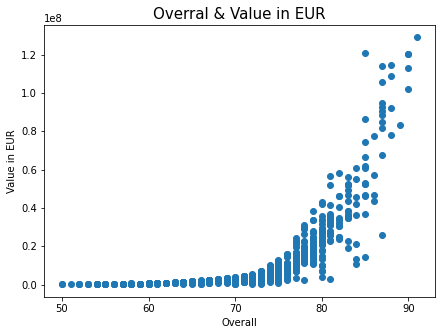

In [359]:
#descriptive statistics fifa

#plot correlation between rating and market value
fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(x=players_fifa_21['overall'], y=players_fifa_21['value_eur'] )
plt.xlabel("Overall")
plt.ylabel("Value in EUR")
plt.title("Overral & Value in EUR", fontsize = 15)
plt.show()

In [360]:
#order teams by player rating/mw/potential...
teams_21 = players_fifa_21.groupby(['club_name']).mean()['overall']
player_strength = teams_21.sort_values(ascending=False)
#player_strength = player_strength.to_numpy
#player_strength['Ch'] = 1
player_strength
ser = pd.Series(player_strength)
#print (ser.index.to_numpy())
#ser[0].index
ser
tmp =  np.append([ser.index.to_numpy()],[ser.to_numpy()], axis=0 )
tmp = np.swapaxes(tmp, 0,1)
fifa_rating_home = pd.DataFrame(tmp, columns=['HomeTeam', 'Rating_Home'])
fifa_rating_away = pd.DataFrame(tmp, columns=['AwayTeam', 'Rating_Away'])
fifa_rating_away


#for i in player_strength:
#    print(i)


,AwayTeam,Rating_Away
0,Chelsea,79.212121
1,Liverpool,78.575758
2,Manchester Utd,77.818182
3,Manchester City,77.484848
4,Tottenham,77.242424
5,Arsenal,76.212121
6,Leicester City,75.151515
7,Everton,74.393939
8,Newcastle Utd,73.272727
9,Crystal Palace,71.454545


In [361]:
#merge dataframes
PL_21_team_ratings = pd.merge(PL_20_21, fifa_rating_home, on='HomeTeam', how='left')
PL_21_team_ratings = pd.merge(PL_21_team_ratings, fifa_rating_away, on='AwayTeam', how='left')

PL_21_team_ratings['Rating difference'] = PL_21_team_ratings['Rating_Home']-PL_21_team_ratings['Rating_Away']

PL_21_team_ratings

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Rating_Home,Rating_Away,Rating difference
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.89,2.02,1.91,2.13,1.92,2.02,1.87,69.939394,76.212121,-6.272727
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,2.13,1.79,2.17,1.85,2.18,1.79,2.12,71.454545,71.30303,0.151515
2,E0,12/09/2020,17:30,Liverpool,Leeds United,4,3,H,3,2,...,2.05,1.85,2.08,1.90,2.16,1.84,2.04,78.575758,67.969697,10.606061
3,E0,12/09/2020,20:00,West Ham,Newcastle Utd,0,2,A,0,0,...,1.87,2.04,1.88,2.09,1.91,2.02,1.86,71.30303,73.272727,-1.969697
4,E0,13/09/2020,14:00,West Brom,Leicester City,0,3,A,0,0,...,1.98,1.93,1.99,1.95,2.01,1.91,1.97,68.71875,75.151515,-6.432765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,23/05/2021,16:00,Liverpool,Crystal Palace,2,0,H,1,0,...,2.04,1.88,2.03,1.98,2.14,1.88,2.00,78.575758,71.454545,7.121212
376,E0,23/05/2021,16:00,Manchester City,Everton,5,0,H,2,0,...,1.89,1.99,1.89,2.20,2.00,2.03,1.85,77.484848,74.393939,3.090909
377,E0,23/05/2021,16:00,Sheffield Utd,Burnley,1,0,H,1,0,...,1.86,2.05,1.86,2.17,1.90,2.03,1.84,69.935484,70.166667,-0.231183
378,E0,23/05/2021,16:00,West Ham,Southampton,3,0,H,2,0,...,1.90,2.02,1.91,2.06,2.01,1.99,1.89,71.30303,71.30303,0.0


In [362]:
#feature selection on Home, Draw, Away

#add column for H A X
conditions = [
    (PL_21_team_ratings['FTR'] == 'H'),
    (PL_21_team_ratings['FTR'] == 'A'),
    (PL_21_team_ratings['FTR'] == 'D')]
choices = [1, 2, 3]
PL_21_team_ratings['identifier'] = np.select(conditions, choices)
y = PL_21_team_ratings['identifier'].to_numpy()
X = PL_21_team_ratings[['Rating difference','Rating_Home', 'Rating_Away', 'HTHG', 'HTAG','HST', 'AST', 'B365H', 'B365A', 'HY']].to_numpy()


In [363]:
#X_new = SelectKBest(chi2, k=2).fit_transform(GX, Gy)
#print(X_new)
sel = SelectKBest(f_classif, k=2)
sel.fit(X, y)
sel.transform(X).shape
sel.scores_

#scores = -np.log10(sel.pvalues_)
#scores

array([26.92577115,  7.68772731, 20.8822317 , 51.81782551, 49.49891117,
       54.57820499, 36.36034325, 21.26003433, 21.32659061,  4.86561014])

In [364]:
#test, which feature brings best values

test = ['overall','potential','value_eur','wage_eur','age','shooting','passing','defending','dribbling','pace','mentality_aggression']
for i in test:
    #order teams by player rating/mw/potential..
    teams_21 = players_fifa_21.groupby(['club_name']).sum()[i]
    player_strength = teams_21.sort_values(ascending=False)

    player_strength
    ser = pd.Series(player_strength)
    tmp = np.append([ser.index.to_numpy()], [ser.to_numpy()], axis=0)
    tmp = np.swapaxes(tmp, 0, 1)
    fifa_rating_home = pd.DataFrame(tmp, columns=['HomeTeam', 'Rating_Home'])
    fifa_rating_away = pd.DataFrame(tmp, columns=['AwayTeam', 'Rating_Away'])
    fifa_rating_away



    #merge dataframes
    PL_21_team_ratings = pd.merge(PL_20_21, fifa_rating_home, on='HomeTeam', how='left')
    PL_21_team_ratings = pd.merge(PL_21_team_ratings, fifa_rating_away, on='AwayTeam', how='left')

    PL_21_team_ratings['Rating difference'] = PL_21_team_ratings['Rating_Home'] - PL_21_team_ratings['Rating_Away']

   #feature selection on Home, Draw, Away

    #add column for H A X
    conditions = [
        (PL_21_team_ratings['FTR'] == 'H'),
        (PL_21_team_ratings['FTR'] == 'A'),
        (PL_21_team_ratings['FTR'] == 'D')]
    choices = [1, 2, 3]
    PL_21_team_ratings['identifier'] = np.select(conditions, choices)
    y = PL_21_team_ratings['identifier'].to_numpy()
    X = PL_21_team_ratings[
         ['Rating difference']].to_numpy()

#X_new = SelectKBest(chi2, k=2).fit_transform(GX, Gy)
#print(X_new)
    sel = SelectKBest(f_classif, k=1)
    sel.fit(X, y)
    sel.transform(X).shape
    print(i, sel.scores_)

#scores = -np.log10(sel.pvalues_)
#scores


overall [30.57675981]
potential [30.45523395]
value_eur [27.9724065]
wage_eur [28.96350318]
age [4.20936641]
shooting [26.50200409]
passing [29.81511811]
defending [19.4090979]
dribbling [26.42890653]
pace [15.82995693]
mentality_aggression [19.65679484]
